In [1]:
%matplotlib inline

# Plot scatter plot in spatial coordinates

This example shows how to use `squidpy.pl.spatial_scatter` to plot
annotations and features stored in `anndata.AnnData`.

This plotting is useful when points and underlying image are available.

::: seealso
See `sphx_glr_auto_examples_plotting_plot_segment.py` for segmentation
masks.
:::


In [2]:
import scanpy as sc
import anndata as ad
import squidpy as sq

adata = sq.datasets.visium_hne_adata()

In [3]:
adata

AnnData object with n_obs × n_vars = 2688 × 18078
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_counts', 'leiden', 'cluster'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'cluster_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'spatial', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

We can take a quick look at the Visium dataset by plotting cluster label
and gene expression of choice.


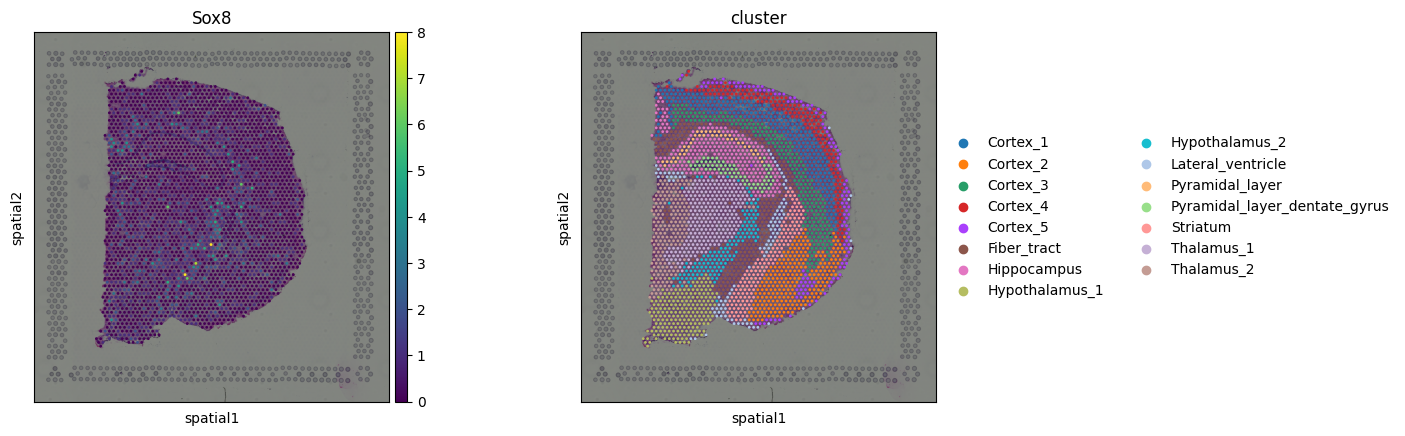

In [4]:
sq.pl.spatial_scatter(adata, color=["Sox8", "cluster"])

`squidpy.pl.spatial_scatter` closely resembles `scanpy.pl.spatial` but
it provides additional functionalities. For instance, with the
`` `shape ``\` argument it\'s possible to plot polygons such as square
or hexagons, a useful feature when technologies other than Visium are
used, such as *Dbit-seq*. Furthermore, it\'s also possible to plot a
scale bar, where size and pixel units must be passed. The size for this
example are not the real values and are for purely visualization
purposes.


In [5]:
adata.obsm['spatial']

array([[8230, 7237],
       [4170, 1611],
       [2519, 8315],
       ...,
       [3276, 8435],
       [3069, 6639],
       [4720, 2090]])

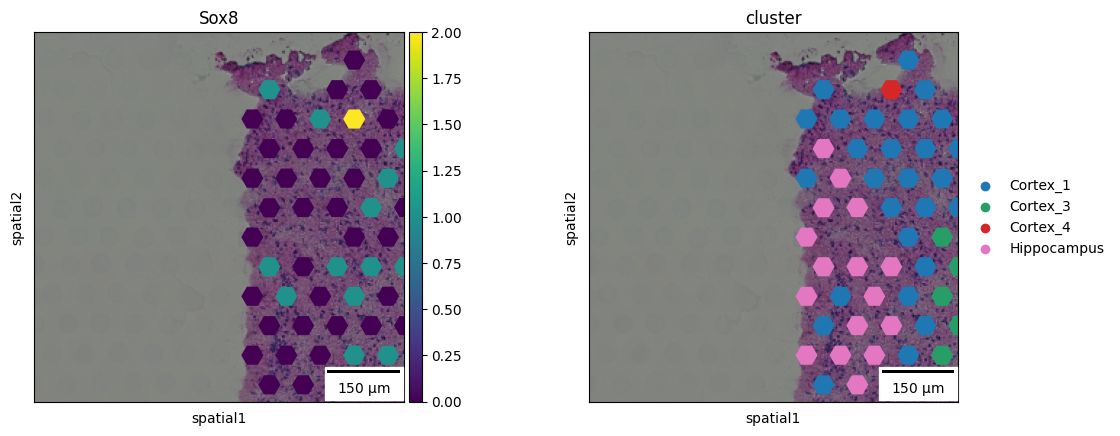

In [6]:
sq.pl.spatial_scatter(
    adata,
    shape='hex',
    color=["Sox8", "cluster"],
    crop_coord=[(1500, 1500, 3000, 3000)],
    scalebar_dx=3.0,
    scalebar_kwargs={"scale_loc": "bottom", "location": "lower right"},
)

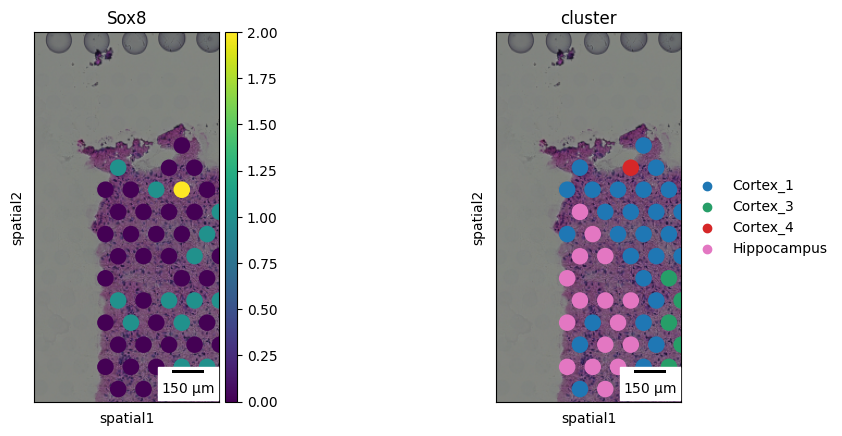

In [7]:
sq.pl.spatial_scatter(
    adata,
    color=["Sox8", "cluster"],
    crop_coord=[(2000, 1000, 3000, 3000)],
    scalebar_dx=5.0,
    scalebar_kwargs={"scale_loc": "bottom", "location": "lower right"},
)

A key feature of `squidpy.pl.spatial_scatter` is that it can handle
multiple slides datasets. For the purpose of showing this functionality,
let\'s create a new `anndata.AnnData` with two Visium slides. We\'ll
also build the spatial graph, to show the edge plotting functionality.


In [8]:
adata.uns['spatial'].keys()

dict_keys(['V1_Adult_Mouse_Brain'])

In [9]:
sq.gr.spatial_neighbors(adata)
adata2 = sc.pp.subsample(adata, fraction=0.5, copy=True)
adata2.uns["spatial"] = {}
adata2.uns["spatial"]["V2_Adult_Mouse_Brain"] = adata.uns["spatial"]["V1_Adult_Mouse_Brain"]
adata_concat = ad.concat(
    {"V1_Adult_Mouse_Brain": adata, "V2_Adult_Mouse_Brain": adata2},
    label="library_id",
    uns_merge="unique",
    pairwise=True,
)

/home/ifichtner/anaconda3/envs/squidpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [10]:
adata_concat.uns['spatial'].keys()

dict_keys(['V1_Adult_Mouse_Brain', 'V2_Adult_Mouse_Brain'])

In [11]:
adata_concat.uns['spatial']['V1_Adult_Mouse_Brain']['images'].keys()

dict_keys(['hires', 'lowres'])

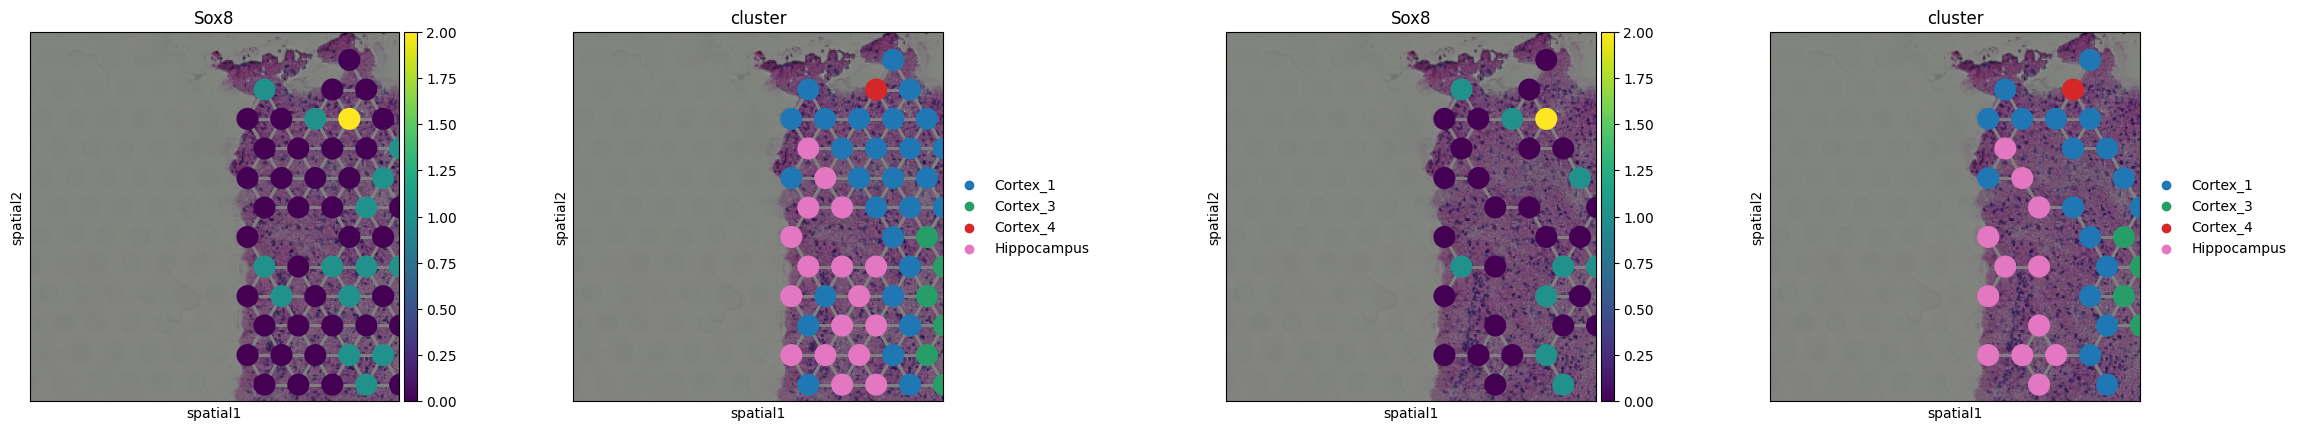

In [12]:
sq.pl.spatial_scatter(
    adata_concat,
    color=["Sox8", "cluster"],
    library_key="library_id",
    connectivity_key="spatial_connectivities",
    edges_width=2,
    crop_coord=[(1500, 1500, 3000, 3000), (1500, 1500, 3000, 3000)],
)

In the above plots, the two Visium datasets are cropped and plotted
sequentially. It\'s possible to select which plots should be plotted
first with the `` `library_first ``[ argument. Furthermore, it\'s also
possible to selectively modify each library, for instance, changing the
size of the points as well as the cropping coordinates. To do so, lists
can be passed to those arguments, with the same number of elements as
the Visium slides to be plotted. This applies to all elements which
could be dataset specific, such as ]{.title-ref}`title`[,
]{.title-ref}`outline_width`[, ]{.title-ref}`size`\` etc.


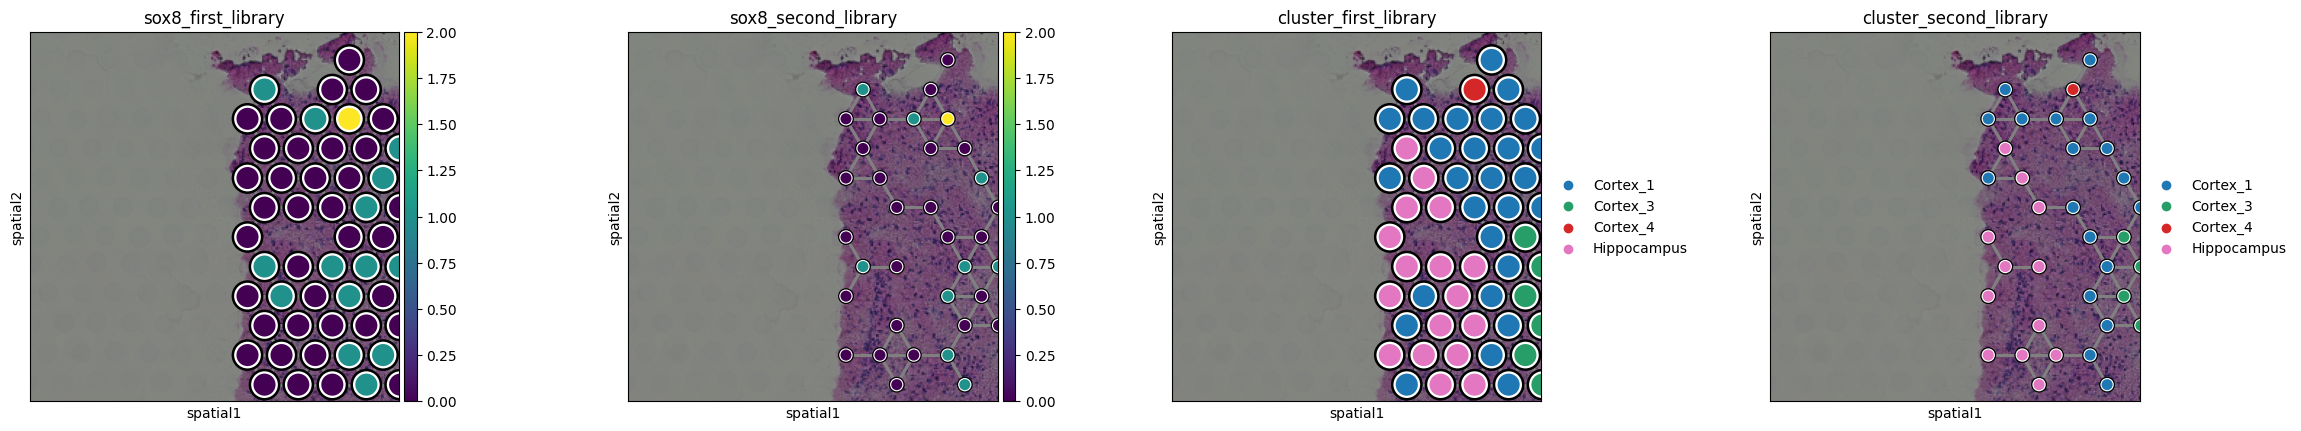

In [13]:
sq.pl.spatial_scatter(
    adata_concat,
    color=["Sox8", "cluster"],
    library_key="library_id",
    library_first=False,
    connectivity_key="spatial_connectivities",
    edges_width=2,
    crop_coord=[(1500, 1500, 3000, 3000), (1500, 1500, 3000, 3000)],
    outline=True,
    outline_width=[0.05, 0.05],
    size=[1, 0.5],
    title=[
        "sox8_first_library",
        "sox8_second_library",
        "cluster_first_library",
        "cluster_second_library",
    ],
)

If no image is present, a simple scatter plot will be plotted, but the
rest of the functionality remains unchanged. It\'s important to specify
`` `shape=None ``[ in order to default to plain scatter plot.
Furthermore, in this setting the ]{.title-ref}`size`[ argument
represents the actual size of the dot, instead of a scaling factor of
the diameter as in the previous plot. See
:func:\`squidpy.pl.spatial_scatter]{.title-ref} for documentation.


/home/ifichtner/anaconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:933: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/home/ifichtner/anaconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:944: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/home/ifichtner/anaconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:933: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/home/ifichtner/anaconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:944: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/home/ifichtner/anaconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:933: UserWarning: No data for colorm

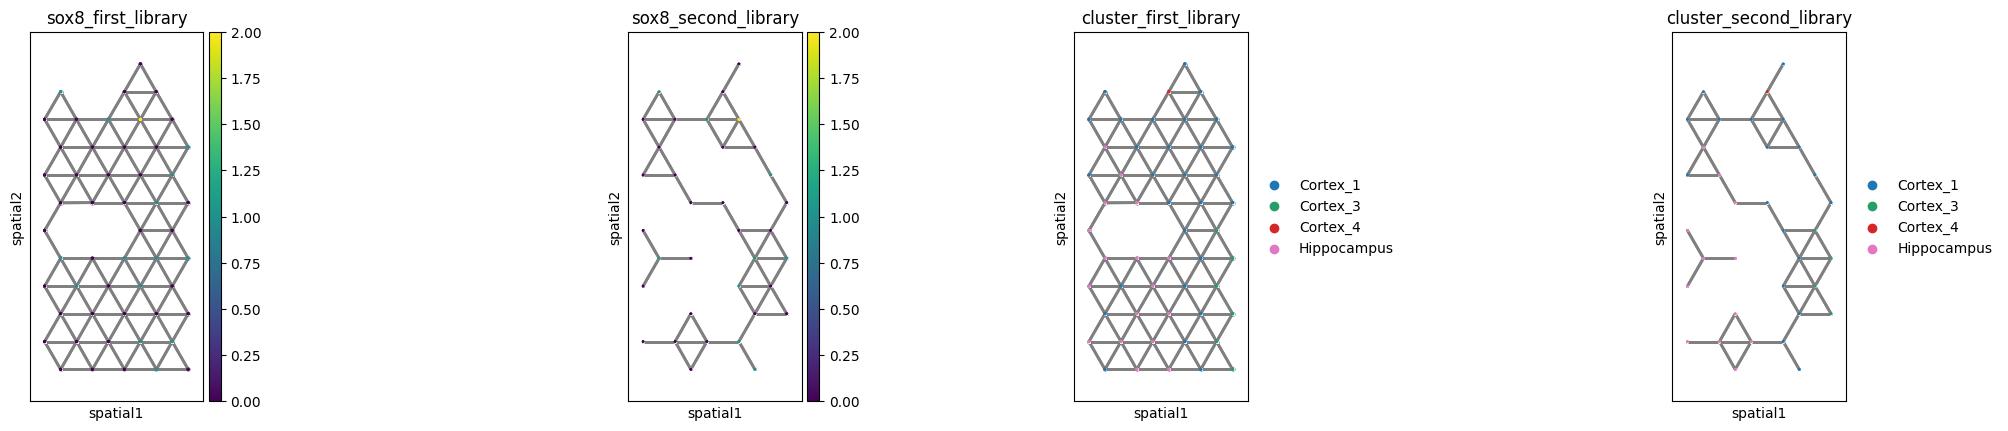

In [17]:
sq.pl.spatial_scatter(
    adata_concat,
    shape=None,
    color=["Sox8", "cluster"],
    library_key="library_id",
    library_first=False,
    connectivity_key="spatial_connectivities",
    edges_width=2,
    crop_coord=[(1500, 1500, 3000, 3000), (1500, 1500, 3000, 3000)],
    outline=True,
    outline_width=[0.05, 0.05],
    size=[1, 0.5],
    title=[
        "sox8_first_library",
        "sox8_second_library",
        "cluster_first_library",
        "cluster_second_library",
    ],
)

> IDF: Actually possible to generate normal spots?

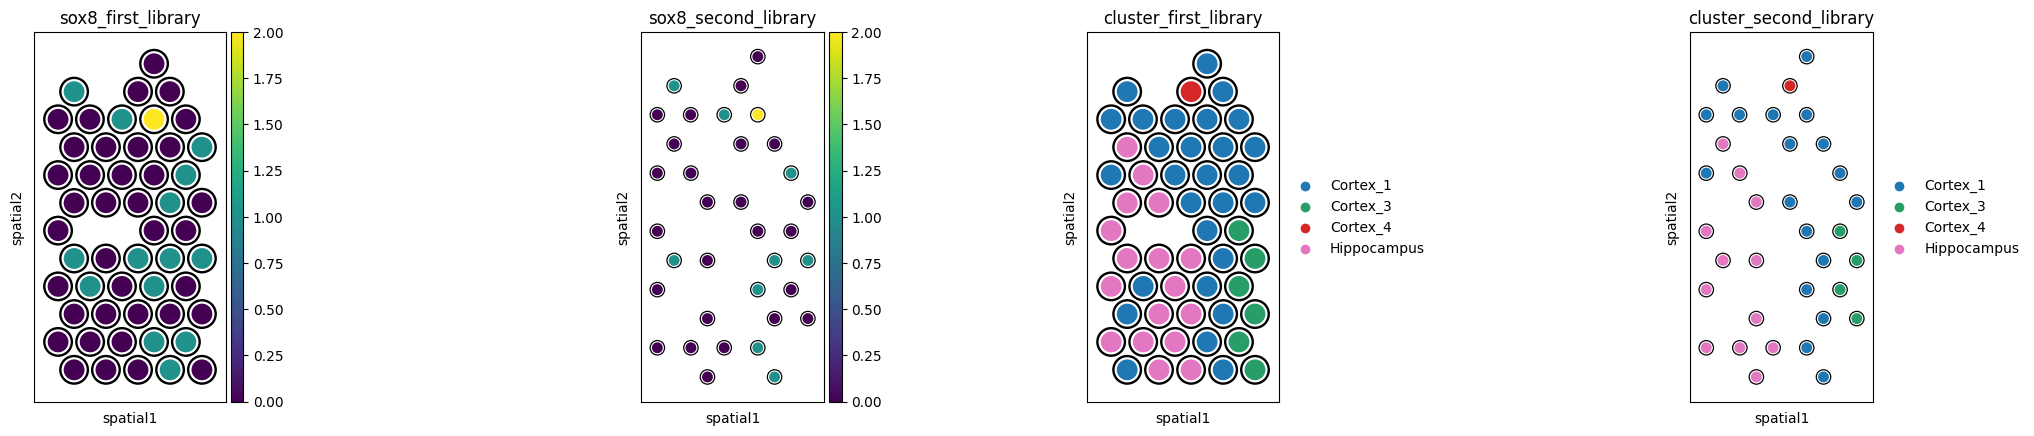

In [20]:
sq.pl.spatial_scatter(
    adata_concat,
    img=False,
    color=["Sox8", "cluster"],
    library_key="library_id",
    library_first=False,
    connectivity_key="spatial_connectivities",
    edges_width=2,
    crop_coord=[(1500, 1500, 3000, 3000), (1500, 1500, 3000, 3000)],
    outline=True,
    outline_width=[0.05, 0.05],
    size=[1, 0.5],
    title=[
        "sox8_first_library",
        "sox8_second_library",
        "cluster_first_library",
        "cluster_second_library",
    ],
)

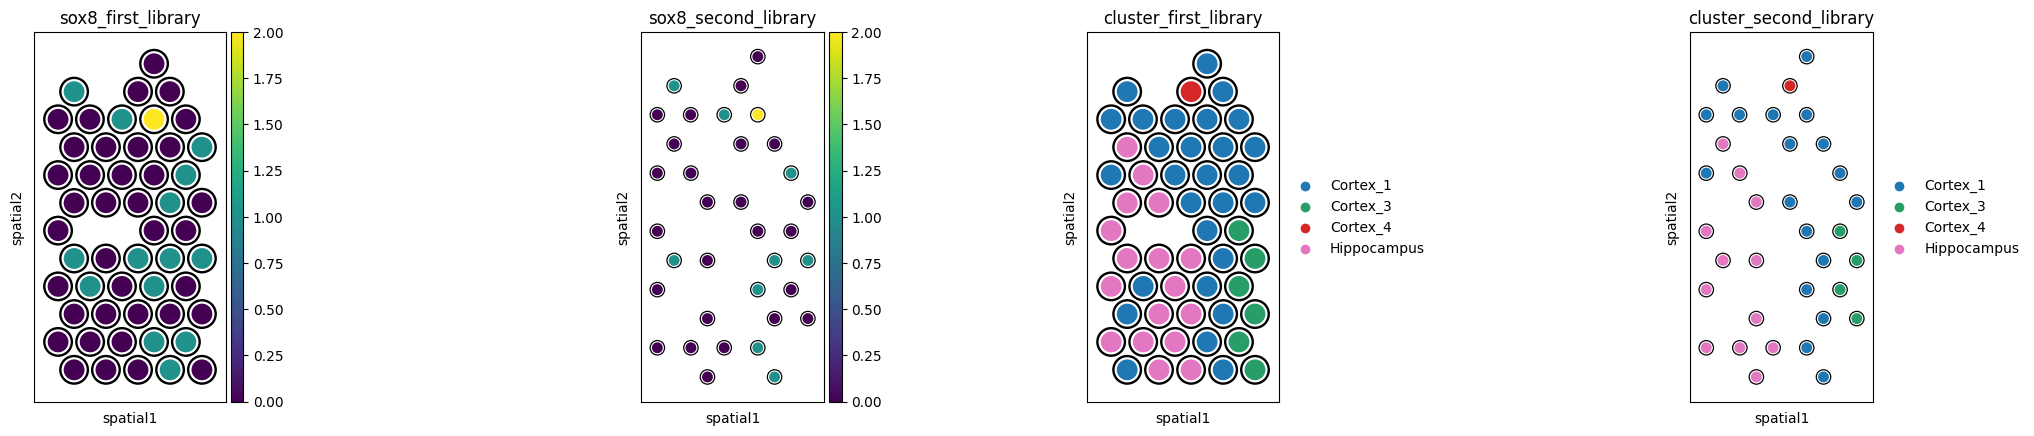

In [21]:
sq.pl.spatial_scatter(
    adata_concat,
    img=False,
    color=["Sox8", "cluster"],
    library_key="library_id",
    library_first=False,
    edges_width=2,
    crop_coord=[(1500, 1500, 3000, 3000), (1500, 1500, 3000, 3000)],
    outline=True,
    outline_width=[0.05, 0.05],
    size=[1, 0.5],
    title=[
        "sox8_first_library",
        "sox8_second_library",
        "cluster_first_library",
        "cluster_second_library",
    ],
)